# Install

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2337, done.
remote: Total 2337 (delta 0), reused 0 (delta 0), pack-reused 2337
Receiving objects: 100% (2337/2337), 8.09 MiB | 8.93 MiB/s, done.
Resolving deltas: 100% (1499/1499), done.


In [ ]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unrar x '/content/drive/MyDrive/QR-Dataset.rar'

In [ ]:
!pip install -r requirements.txt

In [ ]:
!mkdir '/content/pytorch-CycleGAN-and-pix2pix/QR-Dataset/A'
!mkdir '/content/pytorch-CycleGAN-and-pix2pix/QR-Dataset/B'

!cp -r 'QR-Dataset/Train/Train A' QR-Dataset/A/
!cp -r 'QR-Dataset/Test/Test A' QR-Dataset/A/

!cp -r 'QR-Dataset/Train/Train B' QR-Dataset/B/
!cp -r 'QR-Dataset/Test/Test B' QR-Dataset/B/

mkdir: cannot create directory ‘/content/pytorch-CycleGAN-and-pix2pix/QR-Dataset/A’: File exists
mkdir: cannot create directory ‘/content/pytorch-CycleGAN-and-pix2pix/QR-Dataset/B’: File exists


In [ ]:
!python datasets/combine_A_and_B.py --fold_A /content/pytorch-CycleGAN-and-pix2pix/QR-Dataset/A --fold_B /content/pytorch-CycleGAN-and-pix2pix/QR-Dataset/B/ --fold_AB /content/pytorch-CycleGAN-and-pix2pix/QR-Dataset

[fold_A] =  /content/pytorch-CycleGAN-and-pix2pix/QR-Dataset/A
[fold_B] =  /content/pytorch-CycleGAN-and-pix2pix/QR-Dataset/B/
[fold_AB] =  /content/pytorch-CycleGAN-and-pix2pix/QR-Dataset
[num_imgs] =  1000000
[use_AB] =  False
[no_multiprocessing] =  False
split = train, use 461/461 images
split = train, number of images = 461
split = test, use 105/105 images
split = test, number of images = 105
split = .ipynb_checkpoints, use 0/0 images
split = .ipynb_checkpoints, number of images = 0


In [ ]:
!bash ./scripts/download_pix2pix_model.sh facades_label2photo

Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [facades_label2photo]
for details.

--2021-06-14 09:10:01--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704720 (208M)
Saving to: ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’

./checkpoints/facad 100%[===================>] 207.62M  2.38MB/s    in 91s     

2021-06-14 09:11:33 (2.29 MB/s) - ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’ saved [217704720/217704720]



In [ ]:
from PIL import Image

In [ ]:
imgAtrue = Image.open('/content/pytorch-CycleGAN-and-pix2pix/QR-Dataset/Test/Test A/1002-v1-1.png')
imgBtrue = Image.open('/content/pytorch-CycleGAN-and-pix2pix/QR-Dataset/Test/Test B/1002-v1-1.png')
imgBgenerate = Image.open('/content/pytorch-CycleGAN-and-pix2pix/generated image.jpeg')

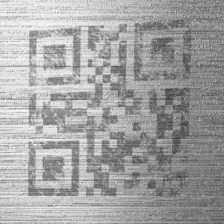

In [ ]:
imgAtrue.resize((224,224))

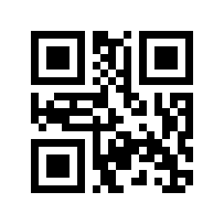

In [ ]:
imgBtrue.resize((224,224))

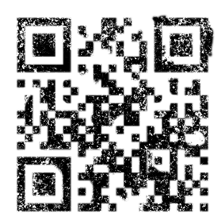

In [ ]:
imgBgenerate.resize((224,224))

In [ ]:
!python train.py --dataroot '/content/pytorch-CycleGAN-and-pix2pix/QR-Dataset' --name qrcode --model pix2pix --direction AtoB

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: /content/pytorch-CycleGAN-and-pix2pix/QR-Dataset	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                     

# Testing


In [ ]:
!ls checkpoints/

In [ ]:
!python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_label2photo_pretrained

# Visualize

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/100_fake_B.png')
plt.imshow(img)

In [ ]:
img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/100_real_A.png')
plt.imshow(img)

In [ ]:
img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/100_real_B.png')
plt.imshow(img)